# Homework #7
### Zachary Laborde

In [ ]:
# imports
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Exercise 1: The basics

1. Create a slider of floats that ranges [-20, 13]; starts with a default value of 7; that has some text describing it
1. Display that slider
1. In a different cell than the one where the slider is created grab the value from it and plot ``value * x ** 2`` from x = -10 to 10 (use matplotlib and put the ploting in a function)
1. Make the process interactive (intead of having to rerun the slider definition cell and the plot cell)

In [ ]:
# 1
slider = widgets.FloatSlider(min=-20, max=13, value=7, description='Some text describing this float slider')
# 2
display(slider)

FloatSlider(value=7.0, description='Some text describing this float slider', max=13.0, min=-20.0)

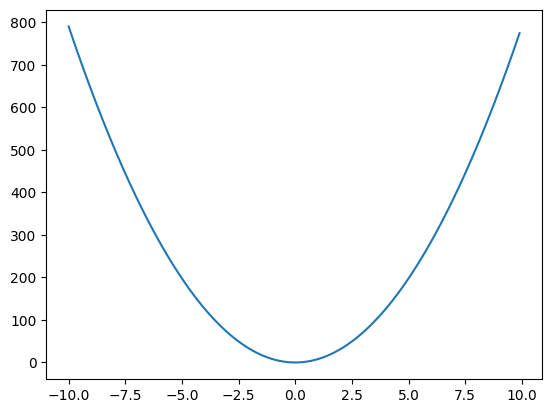

In [ ]:
# 3
def plotLine(val):
  x = np.arange(-10,10,0.1)
  y = val * x ** 2
  plt.plot(x,y)
  plt.show()

plotLine(slider.value)

In [ ]:
# 4
widgets.interact(plotLine, val=slider)

interactive(children=(FloatSlider(value=7.9, description='Some text describing this float slider', max=13.0, m…

<function __main__.lineFunc(val)>

# Exercise 2: Multi-variable interactive functions
1. Create a function that plots a "generalized" [cardioid](https://en.wikipedia.org/wiki/Cardioid). The polar equation for the cardioid is $r = 2 \times (1-cos(\theta))$, x and y are, therefore

$x = r \times cos(\theta)\,\,\,\, = 2 \times (1-cos(\theta)) \times cos(\theta)$

$y = r \times sin(\theta)\,\,\,\, = 2 \times (1-cos(\theta)) \times sin(\theta)$.

By "generalized" what I mean is: multiply $\theta$ by a number (a) in the equation for r and by another number (b) in the equations for x and y. I.e.

$r = 2 \times (1-cos(a\times\theta))$

$x = r \times cos(b\times\theta)$

$y = r \times sin(b\times\theta)$

You should use values for $\theta$ that go beyond $2\pi$ in the function you create.

2. Create a slider for a and b
1. Make the ploting interactive

I find the resulting shapes very pleasing, I hope you do too

In [ ]:
# 2
a_slider = widgets.IntSlider(min=1,max=20,value=10,label='a',description='Inner Circle')
b_slider = widgets.IntSlider(min=1,max=100,value=10,label='b',description='Outer Circle')

In [ ]:
# 1
def plotCardioid(a,b):
  theta = np.arange(0,2*np.pi,1e-3)
  r = 2 * (1 - np.cos(a * theta))
  x = r * np.cos(b * theta)
  y = r * np.sin(b * theta)
  plt.plot(x,y)
  plt.show()

In [ ]:
# 3
widgets.interact(plotCardioid, a=a_slider, b=b_slider)

interactive(children=(IntSlider(value=10, description='Inner Circle', max=20, min=1), IntSlider(value=10, desc…

<function __main__.plotCardioid(a, b)>

# Exercise 3: Options

In your project you may have some options for the user to select. You can use ``ipywidgets.Dropdown`` to create a dropdown menu for those options (there are other widgets that work well for selections). Make the interactions for this exercise "on-demand" (i.e., no live updating whilst moving the slider).

1. Implement the model string for an SIR and a SEIR model in the correct places in ``model_with_options`` (use code that you already have from class)
1. Users love to break things, we can help them see what's wrong by having good errors. For ``model_with_options`` if the user manages to pass some value for ``option`` that isn't SIR or SEIR (and they will manage to do it) and we don't have anything in the ``else`` clause the error will say something to the effect of ``model_string is not defined``. That error message is true but useless, the issue isn't that ``model_string`` doesn't exist but that the user passed an ivalid option. You can ``raise`` custom errors, implement one that is useful in the ``else`` clause. A simple example of error raising

``raise Exception('My error!')``

3. Add a dropdown for the options
3. Add a slider for the model's end date
3. Add a slider for a model parameter that is in both SIR and SEIR models (don't forget to add the variable to the function's signature: ``def model_with_options(option, end_date):`` --> ``def model_with_options(option, end_date, new_parameter):``)
3. Add a slider for a model parameter that is only in one of the models (don't forget to add the variable to the function's signature)
3. In another cell replace the dropdown for the options by some other appropriate widget


In [ ]:
# 1
def model_with_options(modelType:str, transmission, exposure, infection, recovery, end:int):
    if modelType == 'SEIR':
        r = te.loada(f'''
            ES_E: S-> E; k_expose * k_trans * I * S/S0
            EE_I: E-> I; k_infect * E
            II_R: I-> R; k_recover * I

            k_trans = {transmission}
            k_expose = {exposure}
            k_infect = {infection}
            k_recover = {recovery}

            S0 = 1E6

            E = 0
            I = 1
            R = 0

            S = S0 - I - R - E
        ''')
    elif modelType == 'SIR':
        r = te.loada(f'''
        ES_I: S-> I; k_expose * k_trans * I * S/S0
        II_R: I-> R; k_recover * I

        k_trans = {transmission}
        k_expose = {exposure}
        k_recover = {recovery}

        S0 = 1E6

        I = 1
        R = 0

        S = S0 - I - R
        ''')
    else:
        # 2
        raise ValueError('Model Type must be SIR or SEIR. You entered: ' + modelType)
    
    r.simulate(0, end, end*10)
    r.plot()

In [ ]:
# 3
dropdown = widgets.Dropdown(options=['SIR', 'SEIR'], description='Model Type:')

# 4
end_slider = widgets.IntSlider(min=0, max=1000, value=50, description='End Time')

# 5
transmission_slider = widgets.FloatSlider(min=1e-3, max=10, step=.001, value=0.1, description='Transmission Rate')
exposure_slider = widgets.FloatSlider(min=1, max=100, value=50, step=1, description='Average Exposure')
recovery_slider = widgets.FloatSlider(min=2e-3, max=2, value=.2, step=.001, description='Recovery Rate')

# 6
infection_slider = widgets.FloatSlider(min=2e-3, max=2, value=.2, step=.001, description='Infection Rate')

In [ ]:
widgets.interact(model_with_options, modelType=dropdown, transmission=transmission_slider, infection=infection_slider, recovery=recovery_slider, exposure=exposure_slider, end=end_slider)

interactive(children=(Dropdown(description='Model Type:', options=('SIR', 'SEIR'), value='SIR'), FloatSlider(v…

<function __main__.model_with_options(modelType: str, transmission, exposure, infection, recovery, end: int)>

In [ ]:
# 7
buttons = widgets.ToggleButtons(options=['SIR', 'SEIR'], description='Model Type:')
widgets.interact(model_with_options, modelType=buttons, transmission=transmission_slider, infection=infection_slider, recovery=recovery_slider, exposure=exposure_slider, end=end_slider)

interactive(children=(ToggleButtons(description='Model Type:', options=('SIR', 'SEIR'), value='SIR'), FloatSli…

<function __main__.model_with_options(modelType: str, transmission, exposure, infection, recovery, end: int)>

# Exercise 4: Decorating code
With python you can super-charge functions with decorators ([read more](https://realpython.com/primer-on-python-decorators/)), in short: "decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it." Isn't that exacly what we are doing with the sliders and functions? We are grabing a simple function that plots, e.g., a cardioid and we're extending its behaviour to be interactive. The decoration syntax looks like

``
@decorator
def function(var1, var2, ...):
    do_things
    return
``

So intead of

``
def cube(x):
    return x**3
widgets.interact(cube, x=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='To cube:',
    value=3
))
``

you could do 

``
@widgets.interact(x=widgets.IntSlider(min=0,max=10,step=1,description='To cube:',value=3))
def cube(x):
    return x**3
``

Are those two any different? No (maybe one of them is sligtly faster), in this case it's all about the coder's personal preference. There are other situations that I believe decorators are better.

Choose one of the previous exercises to remake using decorators

In [ ]:
@widgets.interact(val=widgets.FloatSlider(min=-20, max=13, value=7, description='Some text describing this float slider'))
def plotLine(val):
  x = np.arange(-10,10,0.1)
  y = val * x ** 2
  plt.plot(x,y)
  plt.show()

interactive(children=(FloatSlider(value=7.0, description='Some text describing this float slider', max=13.0, m…